In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot

## CPL/RIDGE

In [5]:
# load HMC results
all_thetas = np.load('../../data/commaai/mcmc/filtered_gaussian_resampled/Ridge/all_thetas_L100_3000.npy')
# load VA results
lower_bounds = np.load('../../data/commaai/va/filtered_gaussian_resampled/Ridge/lower_bounds_factor_4_50.npy')
mu_ts = np.load('../../data/commaai/va/filtered_gaussian_resampled/Ridge/mu_ts23_factor_4_50.npy')
B_ts = np.load('../../data/commaai/va/filtered_gaussian_resampled/Ridge/B_ts23_factor_4_50.npy')
d_ts = np.load('../../data/commaai/va/filtered_gaussian_resampled/Ridge/d_ts23_factor_4_50.npy')

In [6]:
# take last 1% of VA results
iterations = len(lower_bounds)
mu_t = np.mean(mu_ts[int(0.9*iterations):iterations,:], axis = 0)
B_t = np.mean(B_ts[int(0.9*iterations):iterations,:], axis = 0)
d_t = np.mean(d_ts[int(0.9*iterations):iterations,:], axis = 0)
var = np.sqrt(np.diag(B_t.dot(B_t.T) + d_t**2))
samples_tau = np.exp(np.random.normal(mu_t[10], var[10], 100000))
#var[10] = np.std(samples_tau)
mu_t[10] = np.mean(samples_tau)
# take results for HMC after burnin
burnin = 500
# transform log tau
all_thetas2 = all_thetas.copy()
all_thetas2[:,10] = np.exp(all_thetas[:,10])
mu_hmc = np.mean(all_thetas2[500:,:], axis = 0)
std_hmc = np.std(all_thetas[500:,:], axis = 0)

In [84]:
samples_hmc = all_thetas2[100:]
samples_va = np.random.multivariate_normal(mu_t.reshape(11,), np.diag(var), samples_hmc.shape[0])

In [85]:
va_df = pd.DataFrame(samples_va[:,0:10])
va_df['method'] = np.array(range(0, va_df.shape[0]))
va_df = pd.melt(va_df,id_vars=['method'],var_name='parameter', value_name='va_value')
hmc_df = pd.DataFrame(samples_hmc[:,0:10])
hmc_df['method'] = np.array(range(0, hmc_df.shape[0]))
hmc_df = pd.melt(hmc_df,id_vars=['method'],var_name='parameter', value_name='hmc_value')
#va_df.merge(hmc_df, left_on='method', right_on='method')

In [86]:
va_df['parameter'] = va_df['parameter'].astype('string')
va_df['hmc_value'] = hmc_df['hmc_value']

In [89]:
va_df

,method,parameter,va_value,hmc_value
0,0,0,0.143279,-0.004448
1,1,0,0.204259,-0.014505
2,2,0,0.055891,-0.013185
3,3,0,-0.040637,-0.013185
4,4,0,0.013537,-0.042491
...,...,...,...,...
26345,2630,9,-0.302246,-0.053151
26346,2631,9,0.287487,-0.055152
26347,2632,9,-0.114729,-0.055152
26348,2633,9,0.343576,-0.037228


In [90]:
from pandas.api.types import CategoricalDtype

cat_month = CategoricalDtype(
    ['0', '1', '2', '3', '4', '5',
     '6', '7', '8', '9']
)

va_df['parameter'] = va_df['parameter'].astype(cat_month)

(<Figure size 864x576 with 11 Axes>,
 [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>])

<Figure size 432x288 with 0 Axes>

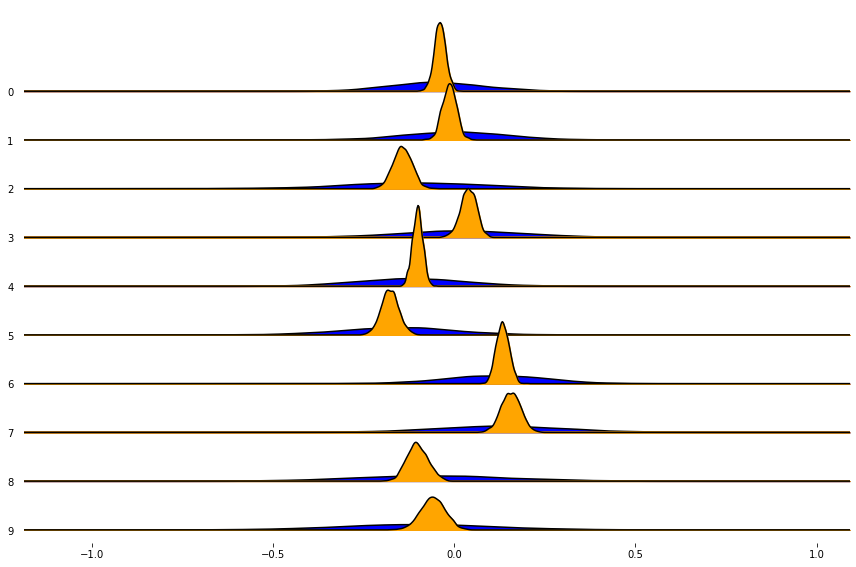

In [93]:
plt.figure()
joyplot(
    data=va_df[['va_value', 'hmc_value', 'parameter']], 
    by='parameter',
    column=['va_value', 'hmc_value'],
    color=['blue', 'orange'],
    figsize=(12, 8)
)

In [18]:
samples_va.shape

(2635, 11)